# Preparation

In [1]:
import csv
import regex
import datetime as dt
from datetime import timedelta
import locale
locale.setlocale(locale.LC_TIME, 'id-ID.UTF-8')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cdist
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")
#from feature_engine.outlier_removers import Winsorizer

## Import dataset

In [2]:
df = pd.read_csv("Coret-Coret Marketing_Transaction Details (TA Hammam)_2006-2105.csv")
# df = pd.read_csv("Coret-Coret Marketing_Transaction Details (TA Hammam)_2003-2105.csv")
# df = pd.read_csv("Coret-Coret Marketing_Transaction Details (TA Hammam)_1904-2104.csv")
display(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51767 entries, 0 to 51766
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delivery_date     51767 non-null  object 
 1   delivery_status   51767 non-null  object 
 2   no_order          51767 non-null  object 
 3   Channel           51767 non-null  object 
 4   transaction_type  51767 non-null  object 
 5   ID CL             30752 non-null  float64
 6   nama_komunitas    27953 non-null  object 
 7   name              51767 non-null  object 
 8   username          51752 non-null  object 
 9   useremail         51752 non-null  object 
 10  telp              51691 non-null  object 
 11  prod_id           51027 non-null  float64
 12  produk            51027 non-null  object 
 13  harga             51767 non-null  float64
 14  qty               51767 non-null  float64
 15  subtotal          51767 non-null  float64
dtypes: float64(5), object(11)
memory usage: 

None

,delivery_date,delivery_status,no_order,Channel,transaction_type,ID CL,nama_komunitas,name,username,useremail,telp,prod_id,produk,harga,qty,subtotal
0,1 Jun 2020,delivered,54SSWRQQQ247,CL,normal,36.0,CL09 Bu agustin,CL09 Bu Agustin,Zakia Puspa Ramdhani,zakiapuspa24@gmail.com,087800014499,180.0,DAGING AYAM KARKAS 700GR,25000.0,3.0,75000.0
1,1 Jun 2020,delivered,54SSWRQQQ247,CL,normal,36.0,CL09 Bu agustin,CL09 Bu Agustin,Zakia Puspa Ramdhani,zakiapuspa24@gmail.com,087800014499,166.0,DAGING AYAM CEKER KG,25000.0,2.0,50000.0
2,2 Jun 2020,delivered,54SSWSQQQ060,CL,normal,6.0,NaN,CL38 Roma Suci,Zakia Puspa Ramdhani,zakiapuspa24@gmail.com,087800014499,237.0,GREENFIELD UHT CHOCOMALT 250ML,7000.0,2.0,14000.0
3,2 Jun 2020,delivered,54SSWSQQQ060,CL,normal,6.0,NaN,CL38 Roma Suci,Zakia Puspa Ramdhani,zakiapuspa24@gmail.com,087800014499,180.0,DAGING AYAM KARKAS 700GR,25000.0,3.0,75000.0
4,2 Jun 2020,delivered,54SSWSQQQ060,CL,normal,6.0,NaN,CL38 Roma Suci,Zakia Puspa Ramdhani,zakiapuspa24@gmail.com,087800014499,166.0,DAGING AYAM CEKER KG,25000.0,2.0,50000.0
5,2 Jun 2020,delivered,56SSWRQQQ053,CL,normal,12.0,CL15 Bu Mikail,CL15 Bu Mikail,Ternakfresh Indonesia,ternakmart@gmail.com,081381306699,169.0,DAGING AYAM KARKAS 1KG PARTING 12,35000.0,1.0,35000.0
6,2 Jun 2020,delivered,56SSWRQQQ053,CL,normal,12.0,CL15 Bu Mikail,CL15 Bu Mikail,Ternakfresh Indonesia,ternakmart@gmail.com,081381306699,225.0,DAGING SAPI GILING 500GR,62000.0,1.0,62000.0
7,2 Jun 2020,delivered,56SSWRQQQ0X0,CL,normal,11.0,CL27 Bu Intan,CL27 Bu Intan,Ternakfresh Indonesia,ternakmart@gmail.com,0895345368597,210.0,DAGING SAPI BUNTUT SPECIAL KG,99000.0,1.0,99000.0
8,2 Jun 2020,delivered,56SSWRQQQ0X0,CL,normal,11.0,CL27 Bu Intan,CL27 Bu Intan,Ternakfresh Indonesia,ternakmart@gmail.com,0895345368597,240.0,GREENFIELD UHT CHOCOMALT 1000ML,22000.0,1.0,22000.0
9,2 Jun 2020,delivered,56SSWRQQQ0X0,CL,normal,11.0,CL27 Bu Intan,CL27 Bu Intan,Ternakfresh Indonesia,ternakmart@gmail.com,0895345368597,225.0,DAGING SAPI GILING 500GR,62000.0,2.0,124000.0


In [3]:
print("Dataset dimension : " + str(df.shape))
print('Jumlah Customer : ' + str(len(pd.unique(df['telp']))))
print('Jumlah Transaksi : ' + str(len(pd.unique(df['no_order']))))

Dataset dimension : (51767, 16)
Jumlah Customer : 3639
Jumlah Transaksi : 20345


# Cleaning

In [4]:
#Clean unused atribute
df.drop(['transaction_type', 'ID CL', 'nama_komunitas', 'username', 'useremail', 'prod_id', 'harga', 'qty'],axis=1)

,delivery_date,delivery_status,no_order,Channel,name,telp,produk,subtotal
0,1 Jun 2020,delivered,54SSWRQQQ247,CL,CL09 Bu Agustin,087800014499,DAGING AYAM KARKAS 700GR,75000.0
1,1 Jun 2020,delivered,54SSWRQQQ247,CL,CL09 Bu Agustin,087800014499,DAGING AYAM CEKER KG,50000.0
2,2 Jun 2020,delivered,54SSWSQQQ060,CL,CL38 Roma Suci,087800014499,GREENFIELD UHT CHOCOMALT 250ML,14000.0
3,2 Jun 2020,delivered,54SSWSQQQ060,CL,CL38 Roma Suci,087800014499,DAGING AYAM KARKAS 700GR,75000.0
4,2 Jun 2020,delivered,54SSWSQQQ060,CL,CL38 Roma Suci,087800014499,DAGING AYAM CEKER KG,50000.0
...,...,...,...,...,...,...,...,...
51762,31 Mei 2021,delivered,INV21053100204ZRTX,Outlet,Nanang Arief Pambudhi,089509417907,CIMORY UHT MILK MATCHA 250ML,6500.0
51763,31 Mei 2021,delivered,INV21053100207IHPI,Outlet,Nanang Arief Pambudhi,089509417907,WALLS MAGNUM WHITE ALMOND 80ML,13000.0
51764,31 Mei 2021,delivered,INV21053100207IHPI,Outlet,Nanang Arief Pambudhi,089509417907,GLICO WINGS FROSTBITE COOKIES CREAM 60ML,5000.0
51765,31 Mei 2021,delivered,INV21053100207IHPI,Outlet,Nanang Arief Pambudhi,089509417907,WALLS CORNETTO CLASIC STRAWBERRY 110ML,5000.0


## Clean Telp

In [5]:
#Drop Null
df.dropna(inplace=True)

#standarize telp number
df['telp'] = df['telp'].str.replace('-','')
df['telp'] = df['telp'].str.replace(' ','')
df['telp'] = df['telp'].str.replace('+','')
df['telp'] = df['telp'].str.replace('08', '628', 1)
df = df[df['telp'].str.startswith('628')]

#Clean admin no hp & Invalid
df = df.drop(df[df.telp.eq('6281381306699')
                | df.telp.eq('0')].index)
df = df[~df['telp'].str.contains('1234567')] #<--- Belum Bisa

#drop number with invalid character
df = df.drop(df[df.telp.str.contains(r'[^0-9a-zA-Z]')
                | df.telp.str.contains(r'[a-zA-Z]')].index)
                
#drop abnormal telpon length
df = df[df['telp'].str.len() > 10]
df = df[df['telp'].str.len() < 15]

## Clean Name, Channel, Product

In [6]:
#Clean penyesuaian, test, dan keperluan internal
testing = ['test', 'COBAAA', 'tes123', 'TEXTING', 'penyesuaian', 'penyelamatan', 'stok', 'stock', 'tamu']
df = df[~df['name'].str.contains('|'.join(testing))]

#Clean Old B2B Customer
B2B_cust = ['hotel', 'resto', 'restoran', 'cafe', 'coffee', 'Toko', 'toko', 'Patata', 'Geprek', 'Laziza', 'ayam', 'nasi', 'sego', 'Baksoe', 'Bakso', 'Rismart', 'Nu Mart', 'Warung', 'Rice box','E-Warung', 'ewarung', 'Kedai', 'geprek', 'nelongso', 'pkk', 'pkh']
df = df[~df['name'].str.contains('|'.join(B2B_cust))] 

#Clean B2B Product
B2Bproduct = ['B2B']
df = df[~df['produk'].str.contains('|'.join(B2Bproduct))] 

#Clean Produk Promo & Bundling
Promo = ['PROMO', 'MAM', 'JSM', 'JUARA', 'PESTA', 'GRATIS', 'PAKET', 'SALE', 'PSBB']
df = df[~df['produk'].str.contains('|'.join(Promo))] 

#Clean Based on Channel
channel = ['CL', 'End User', 'Shopee']
df = df[df['Channel'].isin(channel)]

#clean status non delivered
df = df[df.delivery_status.eq('delivered')]

#Cleaning outlier (Paket donasi sembako dan grosir)
## need futher data based technique
donasi = ['donasi', 'garda', 'sembako', 'psbb ']
df = df[~df['name'].str.contains('|'.join(testing))]
df = df[~(df['subtotal'] > 1000000)]
df = df[(df['subtotal'] > 0)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18391 entries, 0 to 51678
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delivery_date     18391 non-null  object 
 1   delivery_status   18391 non-null  object 
 2   no_order          18391 non-null  object 
 3   Channel           18391 non-null  object 
 4   transaction_type  18391 non-null  object 
 5   ID CL             18391 non-null  float64
 6   nama_komunitas    18391 non-null  object 
 7   name              18391 non-null  object 
 8   username          18391 non-null  object 
 9   useremail         18391 non-null  object 
 10  telp              18391 non-null  object 
 11  prod_id           18391 non-null  float64
 12  produk            18391 non-null  object 
 13  harga             18391 non-null  float64
 14  qty               18391 non-null  float64
 15  subtotal          18391 non-null  float64
dtypes: float64(5), object(11)
memory usage: 

In [7]:
print("Dataset dimension : " + str(df.shape))
print('Jumlah Customer : ' + str(len(pd.unique(df['telp']))))
print('Jumlah Transaksi : ' + str(len(pd.unique(df['no_order']))))

Dataset dimension : (18391, 16)
Jumlah Customer : 1195
Jumlah Transaksi : 6516


In [8]:
#parse datetime format
df_clean = df.copy()
df_clean['delivery_date'] = df_clean['delivery_date'].apply(lambda x:dt.datetime.strptime(x,'%d %b %Y'))

df_clean.to_csv("Hasil/Ternakmart_Transaction_CLEAN.csv")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18391 entries, 0 to 51678
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   delivery_date     18391 non-null  datetime64[ns]
 1   delivery_status   18391 non-null  object        
 2   no_order          18391 non-null  object        
 3   Channel           18391 non-null  object        
 4   transaction_type  18391 non-null  object        
 5   ID CL             18391 non-null  float64       
 6   nama_komunitas    18391 non-null  object        
 7   name              18391 non-null  object        
 8   username          18391 non-null  object        
 9   useremail         18391 non-null  object        
 10  telp              18391 non-null  object        
 11  prod_id           18391 non-null  float64       
 12  produk            18391 non-null  object        
 13  harga             18391 non-null  float64       
 14  qty               1839

# Generate LRFM

In [9]:
#group by invoice 
df_group = df_clean.groupby(['no_order', 'telp', 'delivery_date'], as_index = False).agg({'subtotal':'sum'})
df_group

,no_order,telp,delivery_date,subtotal
0,54SSR0QS6022,6281231631020,2020-10-28,238000.0
1,54SSR0QTWU05,628123250805,2020-10-28,180000.0
2,54SSR0QTX0Z7,6281330302020,2020-10-19,250800.0
3,54SSR0QV0512,6281234158275,2020-10-19,52000.0
4,54SSR0QV0735,6285648248736,2020-10-28,43000.0
...,...,...,...,...
6511,INV2105310006BPXSS,6287853355732,2021-05-31,313600.0
6512,INV2105310008NUL5B,62822346282614,2021-05-31,167800.0
6513,INV2105310008PJFTU,6281357188221,2021-05-31,215000.0
6514,INV2105310012501KL,6281230739779,2021-05-31,176500.0


In [10]:
#Group By Telp
#Perform mapping to LRFM
snapshot_date = df_clean['delivery_date'].max() + timedelta(days=1)
lrfm = df_group.groupby(['telp']).agg(Length=('delivery_date', lambda x: (snapshot_date - x.min()).days),
                                   Recency=('delivery_date', lambda x: (snapshot_date - x.max()).days),
                                   Frequency=('no_order', 'count'),
                                   Monetary=('subtotal', 'sum'))
lrfm.to_csv("Hasil/Ternakmart_Transaction_LRFM.csv")
display(lrfm)
lrfm.describe()

,Length,Recency,Frequency,Monetary
telp,,,,
628111699469,66,66,1,165500.0
628112501890,361,344,5,485000.0
628113002154,361,103,2,296000.0
628113020777,202,4,3,575000.0
62811304876,329,27,15,825300.0
...,...,...,...,...
628993360579,314,280,2,955000.0
628993464570,293,293,1,20000.0
628993883705,57,57,1,152800.0


,Length,Recency,Frequency,Monetary
count,1195.000000,1195.000000,1195.000000,1.195000e+03
mean,166.748117,110.894561,5.452720,9.185209e+05
std,110.647111,99.688689,19.091249,3.321828e+06
min,2.000000,1.000000,1.000000,2.000000e+03
25%,75.500000,35.000000,1.000000,1.226500e+05
50%,134.000000,77.000000,2.000000,2.426000e+05
75%,264.000000,162.000000,4.000000,5.257500e+05
max,365.000000,364.000000,441.000000,4.945195e+07


<AxesSubplot:xlabel='Frequency'>

<AxesSubplot:xlabel='Frequency'>

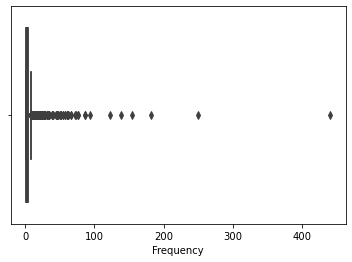

In [11]:
#Check Outlier on Frequency
display(sns.boxplot(lrfm['Frequency']))

#delete outlier
lrfm = lrfm[~(lrfm['Frequency'] > 70)]
sns.boxplot(x=lrfm['Frequency'])

In [12]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column], kde=False)
    
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

def norm_minmax(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

Length's: Skew: 0.39889945949684136, : SkewtestResult(statistic=5.434286051278729, pvalue=5.501626333920569e-08)
Recency's: Skew: 1.0592453246537903, : SkewtestResult(statistic=12.448359483746158, pvalue=1.427491729010814e-35)
Frequency's: Skew: 4.8746776879925235, : SkewtestResult(statistic=28.841776877830892, pvalue=6.425088833683197e-183)
Monetary's: Skew: 5.283301171429238, : SkewtestResult(statistic=29.766730021833627, pvalue=1.0534724857577685e-194)


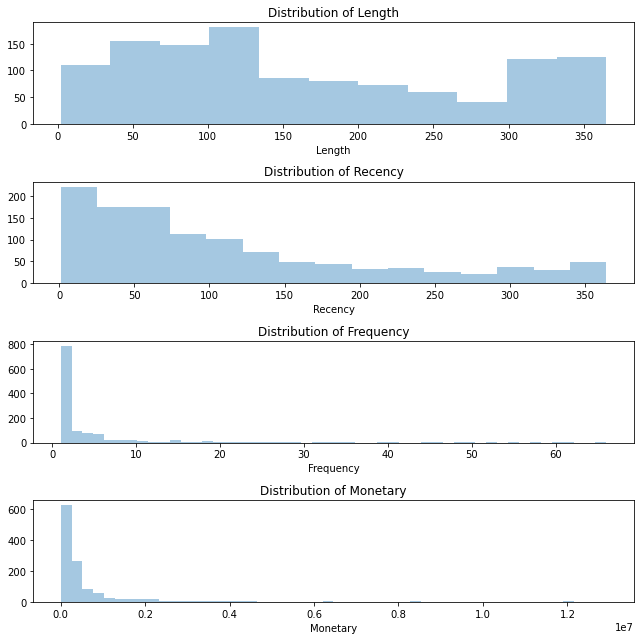

In [13]:
# Plot all 4 graphs to check skewness
plt.figure(figsize=(9, 9))

plt.subplot(4, 1, 1)
check_skew(lrfm,'Length')

plt.subplot(4, 1, 2)
check_skew(lrfm,'Recency')

plt.subplot(4, 1, 3)
check_skew(lrfm,'Frequency')

plt.subplot(4, 1, 4)
check_skew(lrfm,'Monetary')

plt.tight_layout()
plt.savefig('Grafik/before_transform.png', format='png', dpi=1000)

In [14]:
#Frequency dan monetary skewnya ndak masuk akal

## Transformation & Normalization

Length's: Skew: 0.39889945949684136, : SkewtestResult(statistic=5.434286051278729, pvalue=5.501626333920569e-08)
Recency's: Skew: 0.34229643399858195, : SkewtestResult(statistic=4.705225988785324, pvalue=2.5358489223810544e-06)
Frequency's: Skew: 0.9620858519228818, : SkewtestResult(statistic=11.580931340425215, pvalue=5.148365490903843e-31)
Monetary's: Skew: 0.4397771997074671, : SkewtestResult(statistic=5.948838390794034, pvalue=2.7005210684143197e-09)


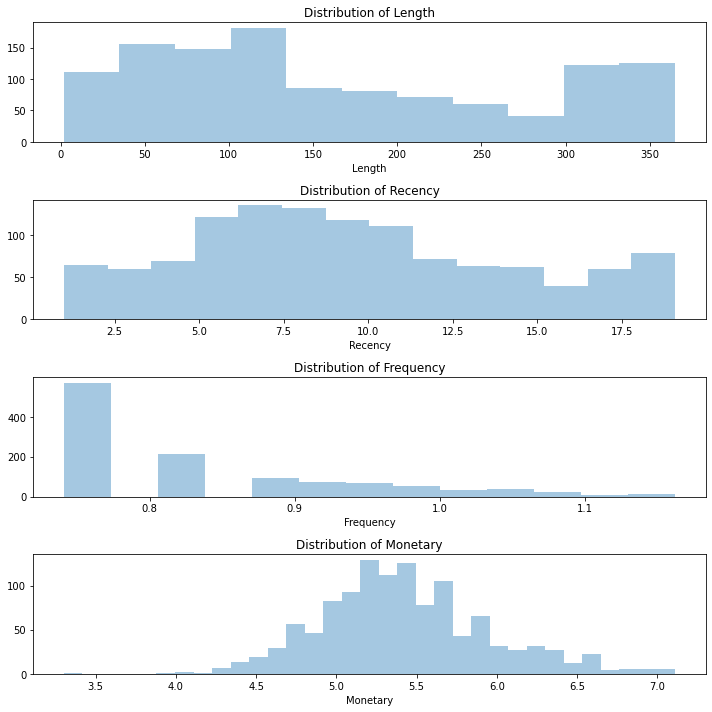

In [15]:
lrfm_trans = lrfm.copy()
#log10 Transformation
# lrfm_trans['Frequency'] = lrfm_trans['Frequency'].apply(lambda x: 1/x)
# lrfm_trans['Monetary'] = lrfm_trans['Monetary'].apply(lambda x: 1/x)

lrfm_trans['Recency'] = np.sqrt(lrfm_trans['Recency'])
lrfm_trans['Frequency'] = np.log10(lrfm_trans['Frequency']+1)
lrfm_trans['Monetary'] = np.log10(lrfm_trans['Monetary']+1)

lrfm_trans['Frequency'] = np.sqrt(lrfm_trans['Frequency'])

lrfm_trans['Frequency'] = np.sqrt(lrfm_trans['Frequency'])

plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
check_skew(lrfm_trans,'Length')
plt.subplot(4, 1, 2)
check_skew(lrfm_trans,'Recency')
plt.subplot(4, 1, 3)
check_skew(lrfm_trans,'Frequency')
plt.subplot(4, 1, 4)
check_skew(lrfm_trans,'Monetary')

plt.tight_layout()
plt.savefig('Grafik/after_transform.png', format='png', dpi=1000)

In [16]:
#Min-Max Normalization
norm_lrfm = norm_minmax(lrfm_trans)

#Mengubah nilai Recency menggunakan 1-R karena merupakan kebalikan dari variabel lain
#R asli jika semakin kecil akan semakin bagus
norm_lrfm['Recency'] = 1-norm_lrfm['Recency']

norm_lrfm.describe()

,Length,Recency,Frequency,Monetary
count,1182.000000,1182.000000,1182.000000,1182.000000
mean,0.449539,0.531233,0.215515,0.557521
std,0.302967,0.260504,0.255069,0.139107
min,0.000000,0.000000,0.000000,0.000000
25%,0.201102,0.348039,0.000000,0.468535
50%,0.360882,0.560575,0.214323,0.545066
75%,0.707300,0.728075,0.411710,0.632000
max,1.000000,1.000000,1.000000,1.000000


# K-Means Clustering

## Elbow Method

In [17]:
#Elbow Method
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(2,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(norm_lrfm) 
    kmeanModel.fit(norm_lrfm)     
      
    distortions.append(sum(np.min(cdist(lrfm, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / norm_lrfm.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(lrfm, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / lrfm.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [18]:
# kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
# print("Elbow at K =", kn.knee)

# plt.plot(K, distortions, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Distortion') 
# plt.title('The Elbow Method using Distortion') 
# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
# plt.savefig('Grafik/Elbow Method using Distortion.png', format='png', dpi=1000)
# plt.show()

Elbow at K = 4


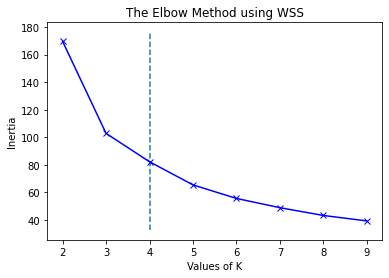

In [19]:
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
print("Elbow at K =", kn.knee)

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using WSS') 
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.savefig('Grafik/Elbow Method using Inertia.png', format='png', dpi=1000)
plt.show() 

## Silhouette Method

In [20]:
# Silhouette Method
euclidean = []
cosine = []
mapping_euclidean = {} 
K = range(1,10)

# Prepare models
for k in K: 
    kmeans = KMeans(n_clusters=6).fit(norm_lrfm)
    normalized_vectors = preprocessing.normalize(norm_lrfm)
    normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
    min_samples = norm_lrfm.shape[1]+1

    euclidean.append(silhouette_score(norm_lrfm, kmeans.labels_, metric='euclidean'))
    cosine.append(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine'))

Highest Euclidean Value = 0.36334635936288445 at K=4


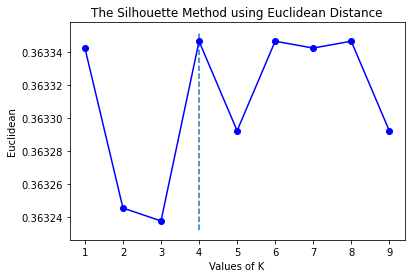

In [21]:
ymax = max(euclidean)
xpos = euclidean.index(ymax)
xmax = K[xpos]

print("Highest Euclidean Value = %s at K=%s" % (ymax, xmax,))
plt.plot(K, euclidean, 'bo-') 
plt.xlabel('Values of K') 
plt.ylabel('Euclidean') 
plt.title('The Silhouette Method using Euclidean Distance') 
plt.vlines(xmax, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.savefig('Grafik/Silhouette Method using Euclidean Distance.png', format='png', dpi=1000)
plt.show() 

Highest Cosine Value : 0.5821421079916311 at K=1


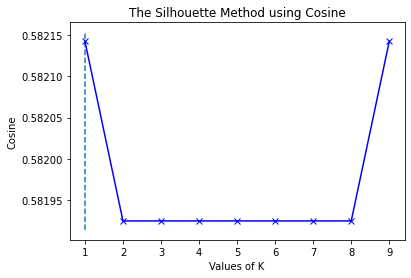

In [22]:
# ymax = max(cosine)
# xpos = cosine.index(ymax)
# xmax = K[xpos]

# print("Highest Cosine Value : %s at K=%s" % (ymax, xmax,))
# plt.plot(K, cosine, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Cosine') 
# plt.title('The Silhouette Method using Cosine') 
# plt.vlines(xmax, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
# plt.savefig('Grafik/Silhouette Method using Cosine.png', format='png', dpi=1000)
# plt.show() 

## Cluster!!

In [23]:
def kmeans(normalised_df_lrfm, clusters_number, original_df_lrfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_lrfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_lrfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

def snake_plot(normalised_df_lrfm, df_lrfm_kmeans, df_lrfm_original):

    normalised_df_lrfm = pd.DataFrame(normalised_df_lrfm, 
                                       index=df_lrfm_original.index, 
                                       columns=df_lrfm_original.columns)
    normalised_df_lrfm['Cluster'] = df_lrfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_lrfm.reset_index(), 
                        id_vars=['telp', 'Cluster'],
                        value_vars=['Length', 'Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

def threeD_plot(df_merge):
    from mpl_toolkits.mplot3d import Axes3D
    
    x = np.array(df_merge['Recency_norm'])
    y = np.array(df_merge['Frequency_norm'])
    z = np.array(df_merge['Monetary_norm'])

    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    # plt.zlabel('Monetary')
    
    ax.scatter(x,y,z, s=(df_merge['Length_norm']*40), marker="s", c=df_merge["Cluster"], cmap="rainbow")
    # scatter = ax.scatter(x, y, c=c, s=s) 
    # legend = ax.legend(*scatter.legend_elements(),
    #                 loc="lower left", title="Classes")
    # ax.add_artist(legend)
    # ax.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0)) 


    return


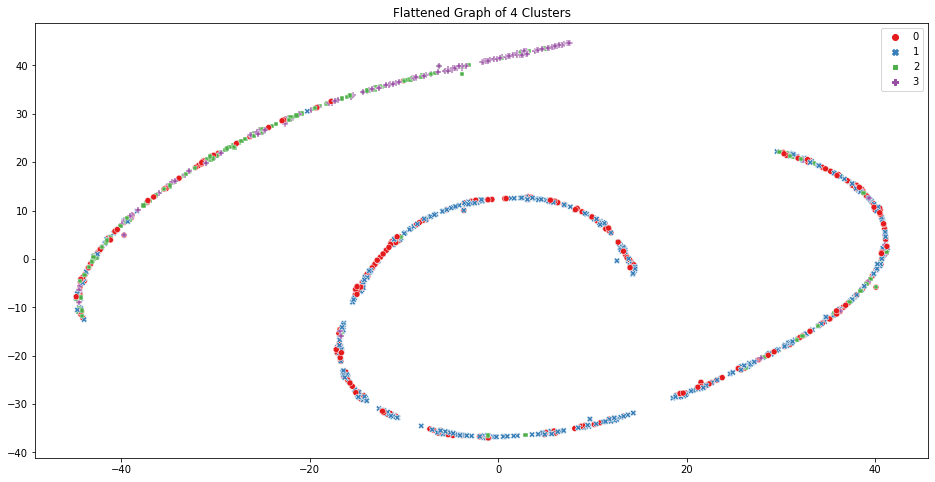

In [24]:
#Scatter Plot
plt.figure(figsize=(16, 8))
df_lrfm_k4 = kmeans(norm_lrfm, 4, lrfm)

plt.savefig('Grafik/Cluster_is_4-flattened.png', format='png', dpi=300)

In [25]:
#Pilih dataframe dengan jumlah cluster yang fix dipakai
df_cluster_fix = df_lrfm_k4.copy()

In [26]:
df_lrfm_all = pd.merge(df_cluster_fix, norm_lrfm, on='telp', suffixes=('_real', '_norm'))

df_lrfm_all.to_csv("Hasil/Ternakmart_Transaction_Clustered_LRFM.csv")
df_lrfm_all

,Length_real,Recency_real,Frequency_real,Monetary_real,Cluster,Length_norm,Recency_norm,Frequency_norm,Monetary_norm
telp,,,,,,,,,
628111699469,66,66,1,165500.0,1,0.176309,0.605945,0.000000,0.503295
628112501890,361,344,5,485000.0,0,0.988981,0.029402,0.470661,0.625853
628113002154,361,103,2,296000.0,0,0.988981,0.493943,0.214323,0.569567
628113020777,202,4,3,575000.0,2,0.550964,0.944687,0.332306,0.645256
62811304876,329,27,15,825300.0,3,0.900826,0.767896,0.727486,0.686448
...,...,...,...,...,...,...,...,...,...
628993360579,314,280,2,955000.0,0,0.859504,0.129742,0.214323,0.703087
628993464570,293,293,1,20000.0,0,0.801653,0.108500,0.000000,0.262416
628993883705,57,57,1,152800.0,1,0.151515,0.637706,0.000000,0.494195


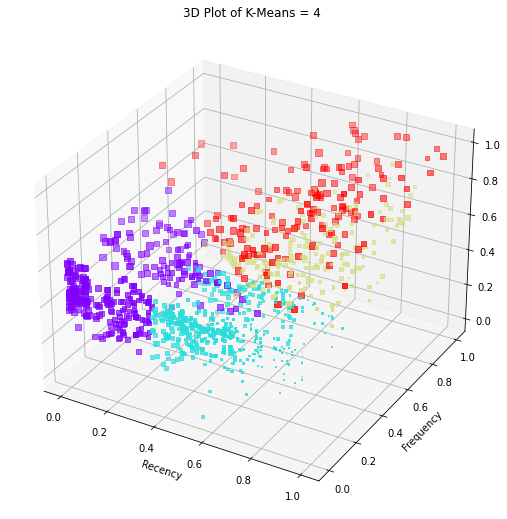

In [27]:
plt.figure(figsize=(16, 9))

#3D Plot
ax = plt.axes(projection='3d')
plt.title('3D Plot of K-Means = 4')
threeD_plot(df_lrfm_all)
plt.savefig('Grafik/Cluster_is_4-3dplot.png', format='png', dpi=300)

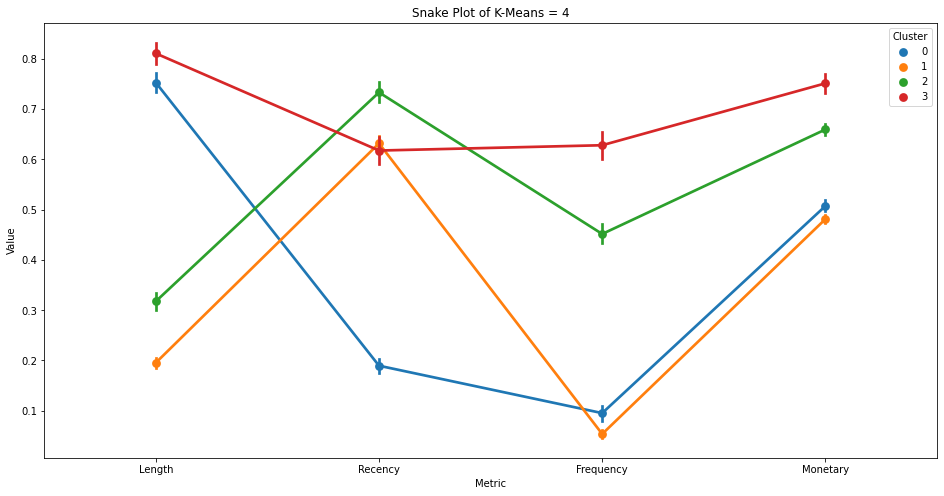

In [28]:
plt.figure(figsize=(16, 8))
#Snake Plot
plt.title('Snake Plot of K-Means = 4')
snake_plot(norm_lrfm, df_lrfm_k4, lrfm)
plt.savefig('Grafik/Cluster_is_4-snakeplot.png', format='png', dpi=300)

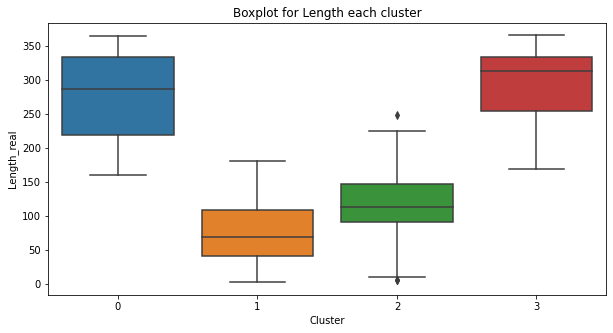

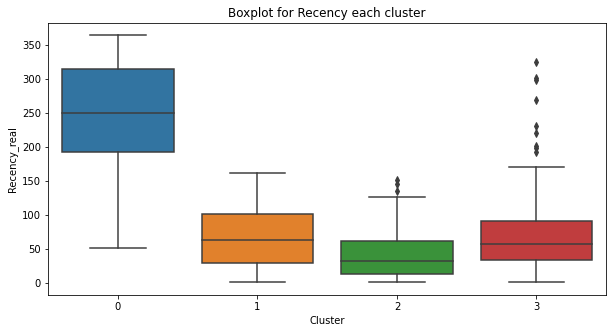

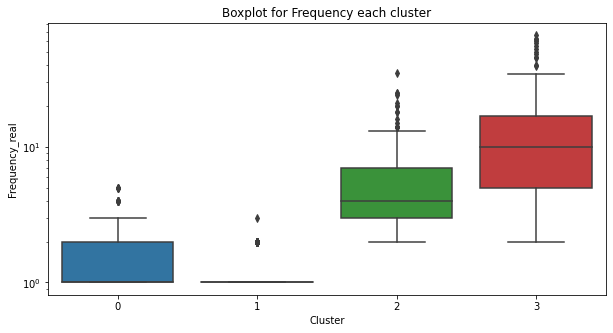

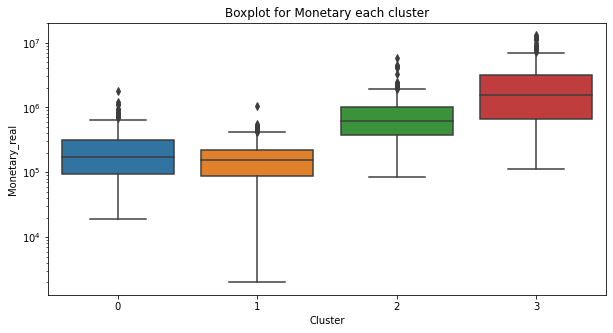

In [29]:
#BoxPlot for Real Data
fig = plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Cluster", y="Length_real", data=df_lrfm_all)
plt.title('Boxplot for Length each cluster') 
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Cluster", y="Recency_real", data=df_lrfm_all)
plt.title('Boxplot for Recency each cluster') 
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.yscale("log")
ax = sns.boxplot(x="Cluster", y="Frequency_real", data=df_lrfm_all)
plt.title('Boxplot for Frequency each cluster') 
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.yscale("log")
ax = sns.boxplot(x="Cluster", y="Monetary_real", data=df_lrfm_all)
plt.title('Boxplot for Monetary each cluster') 
plt.show()

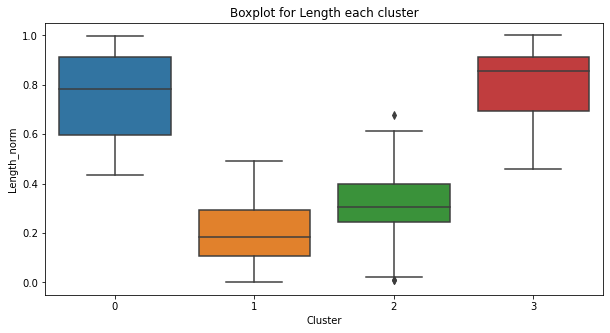

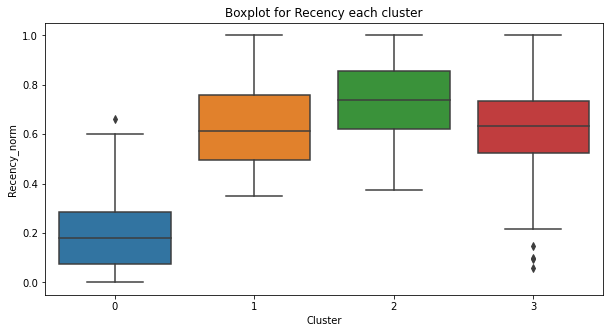

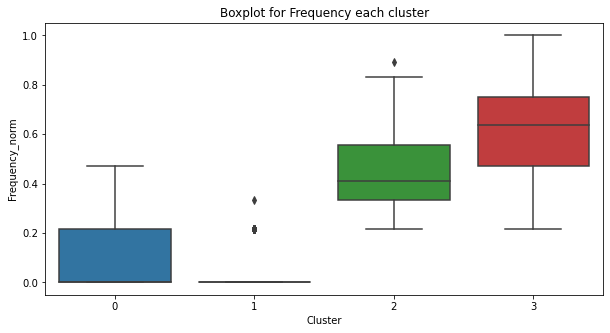

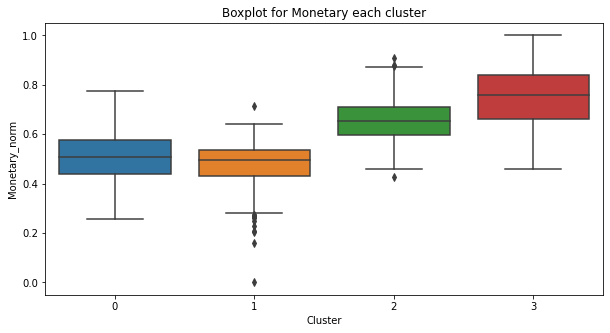

In [30]:
#Boxplot for Normalized data
fig = plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Cluster", y="Length_norm", data=df_lrfm_all)
plt.title('Boxplot for Length each cluster') 
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Cluster", y="Recency_norm", data=df_lrfm_all)
plt.title('Boxplot for Recency each cluster') 
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Cluster", y="Frequency_norm", data=df_lrfm_all)
plt.title('Boxplot for Frequency each cluster') 
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Cluster", y="Monetary_norm", data=df_lrfm_all)
plt.title('Boxplot for Monetary each cluster') 
plt.show()

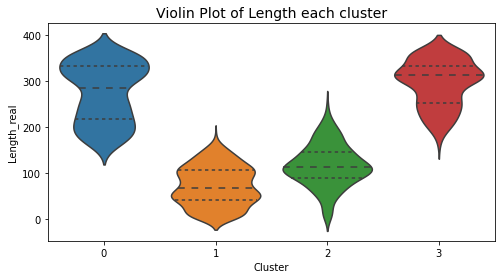

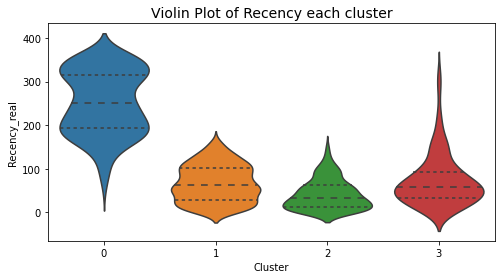

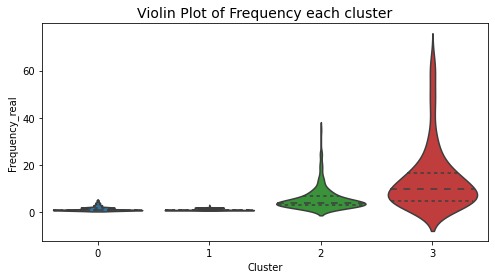

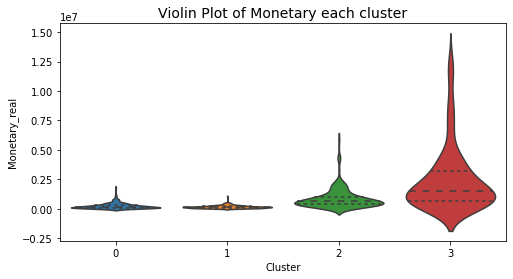

<Figure size 432x288 with 0 Axes>

In [31]:
#Violin Plot
plt.figure(figsize=(8,4))
sns.violinplot(x='Cluster', y='Length_real', data=df_lrfm_all, scale='width', inner='quartile')
plt.title('Violin Plot of Length each cluster', fontsize=14)
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='Cluster', y='Recency_real', data=df_lrfm_all, scale='width', inner='quartile')
plt.title('Violin Plot of Recency each cluster', fontsize=14)
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='Cluster', y='Frequency_real', data=df_lrfm_all, scale='width', inner='quartile')
plt.title('Violin Plot of Frequency each cluster', fontsize=14)
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='Cluster', y='Monetary_real', data=df_lrfm_all, scale='width', inner='quartile')
plt.title('Violin Plot of Monetary each cluster', fontsize=14)
plt.show()

plt.savefig('Grafik/Cluster_is_4-Violin.png', format='png', dpi=300)

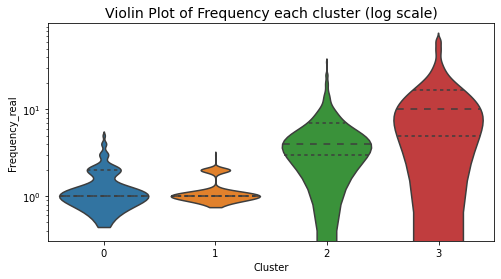

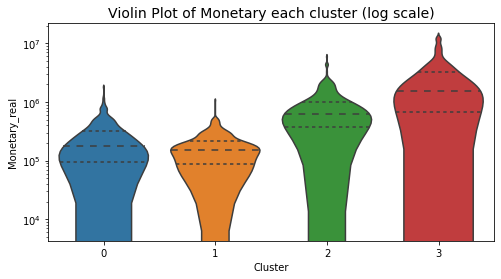

In [32]:
plt.figure(figsize=(8,4))
sns.violinplot(x='Cluster', y='Frequency_real', data=df_lrfm_all, scale='width', inner='quartile')
plt.yscale("log")
plt.title('Violin Plot of Frequency each cluster (log scale)', fontsize=14)
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='Cluster', y='Monetary_real', data=df_lrfm_all, scale='width', inner='quartile')
plt.yscale("log")
plt.title('Violin Plot of Monetary each cluster (log scale)', fontsize=14)
plt.show()

# Cluster Analysis

In [33]:
def lrfm_values(df):
    lrfm_cluster = df.groupby(['Cluster']).agg(['mean','median', 'min', 'max']).round(3)
    return lrfm_cluster

In [34]:
lrfm_values(df_cluster_fix)

Length                   Recency                 Frequency         \
            mean median  min  max     mean median min  max      mean median   
Cluster                                                                       
0        275.313    286  160  364  250.939    250  51  364     1.540      1   
1         72.933     69    2  180   66.850     64   1  162     1.252      1   
2        117.294    113    6  248   41.584     33   1  152     5.836      4   
3        296.395    313  168  365   73.481     58   1  325    14.284     10   

                    Monetary                                   
        min max         mean     median       min         max  
Cluster                                                        
0         1   5   248768.888   175000.0   18900.0   1789502.0  
1         1   3   173710.863   154000.0    2000.0   1058805.6  
2         2  35   883419.101   626700.0   85700.0   5880518.0  
3         2  66  2480454.636  1539200.0  111500.0  12919420.0

In [46]:
#mean from all dataframe
df_lrfm_all.mean(axis=0).round(3)

Length_real          165.183
Recency_real         111.932
Frequency_real         3.944
Monetary_real     638231.351
Cluster                1.190
Length_norm            0.450
Recency_norm           0.531
Frequency_norm         0.216
Monetary_norm          0.558
CLV                   42.983
dtype: float64


## Menghitung CLV

In [36]:
#Nilai bobot didapatkan dari file excel
AHP = {
    'Length' : 0.055,
    'Recency' : 0.104,
    'Frequency' : 0.348,
    'Monetary' : 0.493}

count    1182.000000
mean        0.429830
std         0.165341
min         0.070118
25%         0.303825
50%         0.377812
75%         0.525244
max         0.977064
Name: CLV, dtype: float64

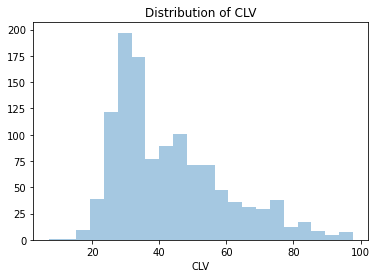

In [37]:
df_lrfm_all['CLV'] = (df_lrfm_all['Length_norm']*AHP['Length'] + df_lrfm_all['Recency_norm']*AHP['Recency'] + df_lrfm_all['Frequency_norm']*AHP['Frequency'] + df_lrfm_all['Monetary_norm']*AHP['Monetary'])
display(df_lrfm_all['CLV'].describe())

#Agar angka lebih cantik dan mudah dibaca, kita kalikan 1000
df_lrfm_all['CLV'] = df_lrfm_all['CLV']*100
plt.title('Distribution of CLV')
sns.distplot(df_lrfm_all['CLV'], kde=False)
plt.show()

## Rank CLV

In [38]:
def clv_values(df):
    clv_cluster = df.groupby(['Cluster']).agg({
        'Length_real': ['min', 'max', 'mean'],
        'Recency_real': ['min', 'max', 'mean'],
        'Frequency_real': ['min', 'max', 'mean'],
        'Monetary_real': ['min', 'max', 'mean'],
        'CLV' : ['min', 'max', 'mean', 'median']
    }).round(0)
    
    return clv_cluster

In [39]:
clv_values(df_lrfm_all).sort_values(by=[('CLV','mean')], ascending=False)

Length_real             Recency_real             Frequency_real      \
                min  max   mean          min  max   mean            min max   
Cluster                                                                       
3               168  365  296.0            1  325   73.0              2  66   
2                 6  248  117.0            1  152   42.0              2  35   
0               160  364  275.0           51  364  251.0              1   5   
1                 2  180   73.0            1  162   67.0              1   3   

              Monetary_real                          CLV                     
         mean           min         max       mean   min   max  mean median  
Cluster                                                                      
3        14.0      111500.0  12919420.0  2480455.0  48.0  98.0  70.0   70.0  
2         6.0       85700.0   5880518.0   883419.0  41.0  87.0  58.0   56.0  
0         2.0       18900.0   1789502.0   248769.0  18.0  61.0  34.0   32.0  
1         1.0        2000.0   1058806.0   173711.0   7.0  49.0  33.0   32.0

In [40]:
#slice data berdasarkan cluster
df_lrfm_c0 = df_lrfm_all[lambda x: x['Cluster'] == 0]
df_lrfm_c1 = df_lrfm_all[lambda x: x['Cluster'] == 1]
df_lrfm_c2 = df_lrfm_all[lambda x: x['Cluster'] == 2]
df_lrfm_c3 = df_lrfm_all[lambda x: x['Cluster'] == 3]

# Market Basket Analysis

## Join Dataframe

In [41]:
df_basket_all = pd.merge(df_clean, df_cluster_fix, on='telp', how='left')
df_basket_all = df_basket_all[['delivery_date', 'no_order', 'telp', 'produk', 'qty', 'Cluster']].copy()

#drop NA from frequency outlier
df_basket_all.dropna(subset=['Cluster'], inplace=True)

print("Dataset dimension : " + str(df_basket_all.shape))
print('Jumlah Customer : ' + str(len(pd.unique(df_basket_all['telp']))))
print('Jumlah Transaksi : ' + str(len(pd.unique(df_basket_all['no_order']))))

Dataset dimension : (12877, 6)
Jumlah Customer : 1182
Jumlah Transaksi : 4662


## Testing all Cluster

In [42]:
#clean the product names
df_basket_all['produk'] = df_basket_all['produk'].str.strip()
df_basket_all['no_order'] = df_basket_all['no_order'].astype('str')

In [43]:
#Split/subsetting dataframe
df_basket_cluster0 = df_basket_all[lambda x: x['Cluster'] == 0]
df_basket_cluster1 = df_basket_all[lambda x: x['Cluster'] == 1]
df_basket_cluster2 = df_basket_all[lambda x: x['Cluster'] == 2]
df_basket_cluster3 = df_basket_all[lambda x: x['Cluster'] == 3]

### Create basket datafarme from transactions data with each row representing one basket

In [44]:
#one hot encode the basket
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#create MBA for every cluster
def createMBA(basket_data) :
    totalTransactions = len(basket_data.index)
    totalCustomers = len(pd.unique(basket_data['telp']))
    minTransaction = totalTransactions*0.01
    min_support_calc = minTransaction/totalTransactions

    print('number of customer in cluster is', totalCustomers)
    print('number of baskets for analysis is', totalTransactions)
    print('minimum support value is ', round(min_support_calc*100, 4), '%')

    basket = basket_data.groupby(['no_order', 'produk'])['qty'].sum().unstack().reset_index().fillna(0).set_index('no_order')
    basket_sets = basket.applymap(encode_units)
    basket_sets.dropna(inplace=True)
    basket_sets = basket_sets.astype(int)
    # display(basket_sets.head(5))

    #create frequent items sets with clculated minimum support
    frequent_itemsets = fpgrowth(basket_sets, min_support=min_support_calc, use_colnames=True)
    # display(frequent_itemsets.describe())

    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
    rules.sort_values('support', ascending = False, inplace = True)

    createMBA.rules = rules

    return rules

In [45]:
for i in range(4) :
    #slice data
    print("Market Basket Analysis for Cluster", i)
    basket_data = df_basket_all[lambda x: x['Cluster'] == i]

    createMBA(basket_data)

    display(createMBA.rules.head(10))
    createMBA.rules.to_csv("Hasil/Ternakmart_Results_FPGrowth_Cluster_%s.csv" % (i,), 'a')
    # rules[(rules['lift'] >= 0.2) & (rules['confidence'] >= 0.1)].sort_values(by=['confidence', 'lift'], ascending=False).to_csv("Data/Ternakmart_Results_FPGrowth_Cluster_%s.csv" % (i,), 'a', newline='')
    print("\n \n")

Market Basket Analysis for Cluster 0
number of customer in cluster is 313
number of baskets for analysis is 1133
minimum support value is  1.0 %


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA STROBERI 1L),0.049793,0.058091,0.026971,0.541667,9.324405,0.024078,2.055074
5,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA COKLAT 1L),0.058091,0.049793,0.026971,0.464286,9.324405,0.024078,1.773721
36,(JABMILK SUSU RASA MELON 1L),(JABMILK SUSU RASA STROBERI 1L),0.051867,0.058091,0.022822,0.440000,7.574286,0.019809,1.681980
7,(JABMILK SUSU RASA MELON 1L),(JABMILK SUSU RASA COKLAT 1L),0.051867,0.049793,0.022822,0.440000,8.836667,0.020239,1.696799
37,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA MELON 1L),0.058091,0.051867,0.022822,0.392857,7.574286,0.019809,1.561630
6,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA MELON 1L),0.049793,0.051867,0.022822,0.458333,8.836667,0.020239,1.750399
14,(JABMILK SUSU RASA ORIGINAL 1L),(JABMILK SUSU RASA STROBERI 1L),0.041494,0.058091,0.018672,0.450000,7.746429,0.016262,1.712561
15,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA ORIGINAL 1L),0.058091,0.041494,0.018672,0.321429,7.746429,0.016262,1.412535
16,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA ORIGINAL 1L),0.049793,0.041494,0.016598,0.333333,8.033333,0.014531,1.437759
17,(JABMILK SUSU RASA ORIGINAL 1L),(JABMILK SUSU RASA COKLAT 1L),0.041494,0.049793,0.016598,0.400000,8.033333,0.014531,1.583679



 

Market Basket Analysis for Cluster 1
number of customer in cluster is 493
number of baskets for analysis is 1660
minimum support value is  1.0 %


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(BUAH APEL FUJI PREMIUM RRC ONS),(BUAH PEAR RRC SWEET ONS),0.062193,0.032733,0.013093,0.210526,6.431579,0.011058,1.225205
5,(BUAH PEAR RRC SWEET ONS),(BUAH APEL FUJI PREMIUM RRC ONS),0.032733,0.062193,0.013093,0.400000,6.431579,0.011058,1.563011
0,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA STROBERI 1L),0.021277,0.024550,0.011457,0.538462,21.933333,0.010934,2.113475
1,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA COKLAT 1L),0.024550,0.021277,0.011457,0.466667,21.933333,0.010934,1.835106
2,(DAGING AYAM FILLET DADA KG),(DAGING AYAM FILLET PAHA KG),0.050736,0.050736,0.011457,0.225806,4.450572,0.008882,1.226132
3,(DAGING AYAM FILLET PAHA KG),(DAGING AYAM FILLET DADA KG),0.050736,0.050736,0.011457,0.225806,4.450572,0.008882,1.226132



 

Market Basket Analysis for Cluster 2
number of customer in cluster is 214
number of baskets for analysis is 3585
minimum support value is  1.0 %


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DAGING AYAM FILLET DADA KG),(DAGING AYAM FILLET PAHA KG),0.065916,0.056270,0.014469,0.219512,3.901045,0.010760,1.209154
1,(DAGING AYAM FILLET PAHA KG),(DAGING AYAM FILLET DADA KG),0.056270,0.065916,0.014469,0.257143,3.901045,0.010760,1.257420
4,(LAHAP WANITA BERAS PREMIUM 5KG),(TELUR AYAM NEGERI 1PACK (ISI 15 BUTIR)),0.045016,0.106913,0.014469,0.321429,3.006445,0.009657,1.316128
5,(TELUR AYAM NEGERI 1PACK (ISI 15 BUTIR)),(LAHAP WANITA BERAS PREMIUM 5KG),0.106913,0.045016,0.014469,0.135338,3.006445,0.009657,1.104460
2,(GULA PASIR 1KG),(TELUR AYAM NEGERI 1PACK (ISI 15 BUTIR)),0.049035,0.106913,0.010450,0.213115,1.993344,0.005208,1.134964
3,(TELUR AYAM NEGERI 1PACK (ISI 15 BUTIR)),(GULA PASIR 1KG),0.106913,0.049035,0.010450,0.097744,1.993344,0.005208,1.053986



 

Market Basket Analysis for Cluster 3
number of customer in cluster is 162
number of baskets for analysis is 6499
minimum support value is  1.0 %


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA COKLAT 1L),0.054089,0.070965,0.032886,0.608000,8.567610,0.029048,2.369987
4,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA STROBERI 1L),0.070965,0.054089,0.032886,0.463415,8.567610,0.029048,1.762834
17,(JABMILK SUSU RASA MELON 1L),(JABMILK SUSU RASA COKLAT 1L),0.048464,0.070965,0.031155,0.642857,9.058798,0.027716,2.601298
16,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA MELON 1L),0.070965,0.048464,0.031155,0.439024,9.058798,0.027716,1.696217
0,(JABMILK SUSU RASA COKLAT 1L),(JABMILK SUSU RASA ORIGINAL 1L),0.070965,0.058416,0.030723,0.432927,7.411066,0.026577,1.660427
1,(JABMILK SUSU RASA ORIGINAL 1L),(JABMILK SUSU RASA COKLAT 1L),0.058416,0.070965,0.030723,0.525926,7.411066,0.026577,1.959683
12,(JABMILK SUSU RASA MELON 1L),(JABMILK SUSU RASA STROBERI 1L),0.048464,0.054089,0.025530,0.526786,9.739214,0.022909,1.998906
13,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA MELON 1L),0.054089,0.048464,0.025530,0.472000,9.739214,0.022909,1.802152
3,(JABMILK SUSU RASA STROBERI 1L),(JABMILK SUSU RASA ORIGINAL 1L),0.054089,0.058416,0.022934,0.424000,7.258252,0.019774,1.634694
2,(JABMILK SUSU RASA ORIGINAL 1L),(JABMILK SUSU RASA STROBERI 1L),0.058416,0.054089,0.022934,0.392593,7.258252,0.019774,1.557292
